In [1]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages: Annotated[list,add_messages]


In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm =ChatGroq(model = "qwen/qwen3-32b")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000002203B46A720>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002203B4CFF80>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
llm1 = init_chat_model("groq:qwen/qwen3-32b")
llm1

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x000002203B1DF830>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x000002203B5252B0>, model_name='qwen/qwen3-32b', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [6]:
llm.invoke("Hello my name is shrii varsha")

AIMessage(content='<think>\nOkay, the user introduced themselves as Shrii Varsha. I should acknowledge their name and offer assistance. Let me make sure to use their name in the response to be friendly. I need to keep it open-ended so they feel comfortable asking anything. Maybe add an emoji to keep it approachable. Let me check for any typos or errors. Alright, that should do it.\n</think>\n\nHello, Shrii Varsha! 😊 How can I assist you today? Let me know if you have any questions or need help with something specific!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 115, 'prompt_tokens': 16, 'total_tokens': 131, 'completion_time': 0.244344475, 'prompt_time': 0.000398276, 'queue_time': 0.049691684, 'total_time': 0.244742751}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_f17c2eb555', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--35d0ce19-e04d-4d61-9d54-34404270c0ff-0', usage_metadata={'input_tokens': 16, 'out

In [7]:
## Node Functionality
def chatbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [ ]:
graph_builder = StateGraph(State)
graph_builder.add_node("llmchat",chatbot)
graph_builder.add_edge(START,"llmchat")
graph_builder.add_edge("llmchat",END)

graph = graph_builder.compile()

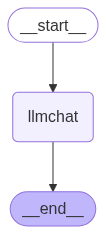

In [9]:
from IPython.display import Image,display

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
graph.invoke({"messages":"Hi"})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='a8c47a35-9484-40a2-9026-0d71133dfa8b'),
  AIMessage(content='<think>\nOkay, the user said "Hi". That\'s pretty straightforward. I need to respond in a friendly and welcoming way. Let me make sure to keep it open-ended so they feel comfortable to ask anything. Maybe add a smiley to keep the tone light. Let me check for any typos and ensure the response is concise.\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 9, 'total_tokens': 91, 'completion_time': 0.196969097, 'prompt_time': 0.000208918, 'queue_time': 0.055230186, 'total_time': 0.197178015}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_f17c2eb555', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--32347711-197b-411f-81ea-5e494beb458d-0', usage_metadata={'input_tokens': 9, 'output_tokens': 82, 'total

In [ ]:
response=graph.invoke({"messages":"Hi"})
response["messages"][-1].content

'<think>\nOkay, the user said "Hi". That\'s a greeting. I should respond in a friendly and welcoming way. Maybe start with a greeting and offer assistance. Let me check the guidelines to make sure I\'m following the right tone. They want the response to be conversational and not too formal. So something like "Hello! How can I help you today?" or "Hi there! What can I assist you with?" That should work. I need to keep it open-ended to invite them to ask questions or share what they need help with. Alright, let\'s go with one of those options.\n</think>\n\nHello! How can I help you today? 😊'

In [ ]:
msg = {"messages":"Hi"}
response=graph.invoke(msg)

In [50]:
response["messages"][-1].content

'<think>\nOkay, the user said "Hi". I need to respond appropriately. Since it\'s a greeting, I should start with a friendly greeting in return. Maybe add an emoji to keep it warm. Then ask how I can assist them. Keep it open-ended so they can explain what they need help with. Make sure the tone is welcoming and helpful. Avoid using any markdown formatting as per the instructions. Let me put that all together concisely.\n</think>\n\nHi there! 😊 How can I assist you today? Let me know if you have any questions or need help with something specific!'

In [ ]:
response["messages"].append("How are you")
response=graph.invoke(msg)
for m in response["messages"]:
    print(m)
    # If messages are objects (e.g., AI or HumanMessage):
    # print(m.content)


content='Hi' additional_kwargs={} response_metadata={} id='94124a76-3e25-4842-bc80-93a8aadf0456'
content='<think>\nOkay, the user sent "Hi". That\'s pretty casual. I should respond in a friendly and open way to encourage them to elaborate on what they need help with.\n\nFirst, I need to acknowledge their greeting. Then, invite them to ask a question or share what they\'re working on. Keeping it simple and approachable is key here. Maybe add an emoji to keep the tone light.\n\nLet me make sure the response is welcoming and not too formal. They might be looking for assistance with something specific, so prompting them to provide more details will help me address their needs better. Alright, that should work.\n</think>\n\nHello! How can I assist you today? 😊' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 139, 'prompt_tokens': 9, 'total_tokens': 148, 'completion_time': 0.420720413, 'prompt_time': 0.000291795, 'queue_time': 0.049658055, 'total_time': 0.4210122

In [55]:
for event in graph.stream({"messages":"Hi How are you?"}):
    for value in event.values():
        print(value["messages"][-1].content)

<think>
Okay, the user is asking how I am. I should respond in a friendly and approachable way. Let me make sure to acknowledge their question and offer help. Maybe add an emoji to keep it warm. Alright, something like "Hi there! I'm just a bunch of code, so I don't have feelings, but I'm here and ready to help! 😊 How can I assist you today?" That should cover it.
</think>

Hi there! I'm just a bunch of code, so I don't have feelings, but I'm here and ready to help! 😊 How can I assist you today?


### Chatbot with tool

In [12]:
from langchain_tavily import TavilySearch

tool = TavilySearch(max_results = 2)
tool.invoke("What is th e recent ai search")

{'query': 'What is th e recent ai search',
 'follow_up_questions': None,
 'answer': None,
 'images': [],
 'results': [{'url': 'https://blog.google/products/search/google-search-ai-mode-update/',
   'title': 'AI in Search: Going beyond information to intelligence - Google Blog',
   'content': 'AI Mode is our most powerful AI search, with more advanced reasoning and multimodality, and the ability to go deeper through follow-up questions',
   'score': 0.36148077,
   'raw_content': None},
  {'url': 'https://www.pcmag.com/picks/the-best-ai-search-engines',
   'title': "The Best AI Search Engines We've Tested (2025) - PCMag",
   'content': "OpenAI's ChatGPT, the service that popularized generative AI, works for regular web searches. Simply click on Search within the interface to access it.",
   'score': 0.2758636,
   'raw_content': None}],
 'response_time': 1.97}